<a href="https://colab.research.google.com/github/tono000/CS114.K11/blob/master/Feature_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import cv2
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imutils import paths
import numpy as np
import pickle
import random



Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/mydrive',True)

Mounted at /mydrive


In [0]:
path = '/mydrive/My Drive/hog_R_CNN_dataset'
folder = path
print(folder)

/mydrive/My Drive/hog_R_CNN_dataset


In [0]:
model = VGG16(weights = 'imagenet', include_top = False)
model.summary()











Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128

In [0]:
dem=0
data=[0,0]
X = pd.DataFrame(columns=range(224*224))
Y = pd.DataFrame(columns=range(1))
from google.colab.patches import cv2_imshow

for i in range(0,2):
  temp_arr=[]
  temp_label=[]
  branch_folder = folder + "/" + os.listdir(folder)[i]
  for filenames in os.listdir(branch_folder):
          print(dem)
          img=cv2.imread(branch_folder+'/'+filenames)
          print(branch_folder+'/'+filenames)
          imgCrop=img[0:((img.shape[0]-1)//2),]     
          imgCrop=cv2.resize(imgCrop, (224,224))
          arr=imgCrop.flatten()   
          temp_arr.append(arr)
          temp_label.append(1-i)
          dem=dem+1
          
  t=pd.DataFrame(data = temp_arr)
  X=X.append(t,ignore_index=True)
  Y=Y.append(temp_label,ignore_index=True)
          
  


0
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance4.jpg
1
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance7.jpg
2
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance6.jpg
3
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance16.jpg
4
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance13.jpg
5
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance11.jpg
6
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance10.jpg
7
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance14.jpg
8
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance15.jpg
9
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance18.jpg
10
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance19.jpg
11
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance27.jpg
12
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance25.jpg
13
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance26.jpg
14
/mydrive/My Drive/hog_R_CNN_dataset/Neg_hog_R_CNN/instance

In [0]:
le = LabelEncoder()
labels = le.fit_transform(Y)
labels=pd.DataFrame(data = labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


instance4.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2630>


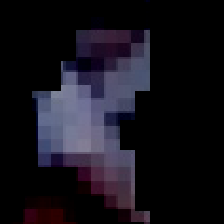

instance7.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


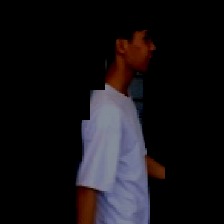

instance6.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


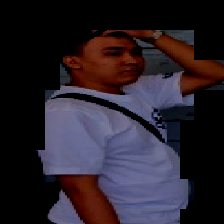

instance16.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


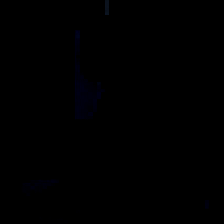

instance13.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


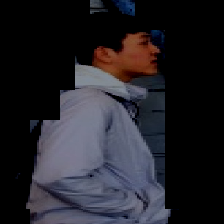

instance11.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


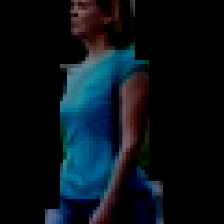

instance10.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


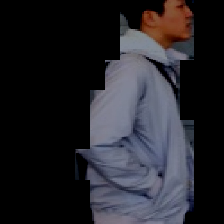

instance14.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


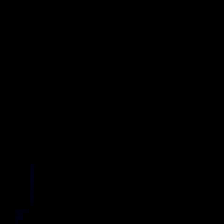

instance15.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


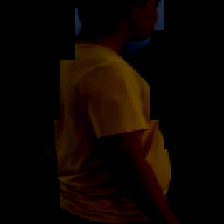

instance18.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


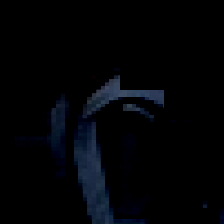

instance19.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


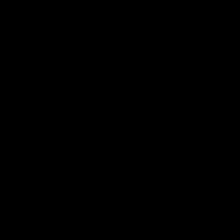

instance27.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


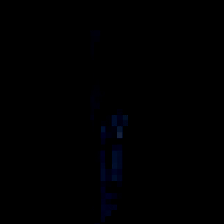

instance25.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


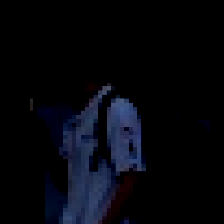

instance26.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


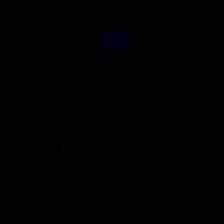

instance34.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


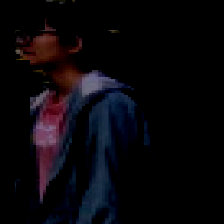

instance32.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


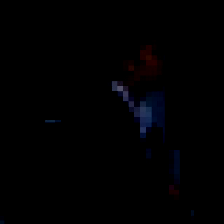

instance45.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


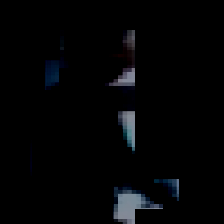

instance47.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


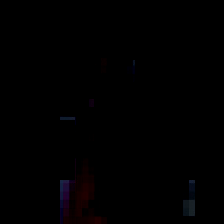

instance39.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


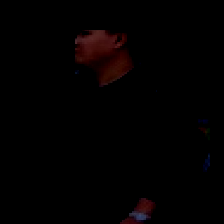

instance40.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


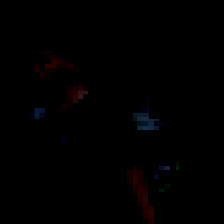

instance59.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


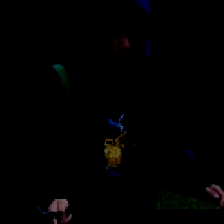

instance62.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


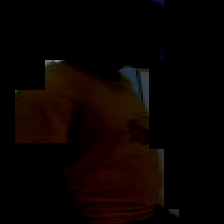

instance65.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


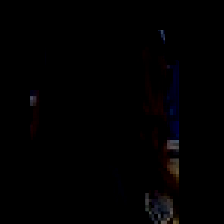

instance80.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


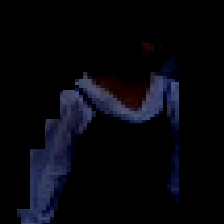

instance71.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


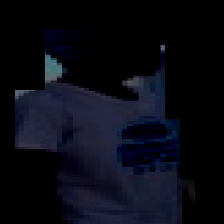

instance75.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA76179EC88>


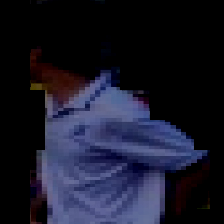

instance78.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


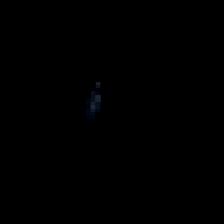

instance72.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


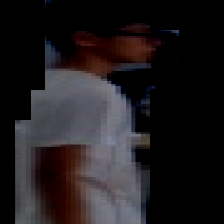

instance74.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


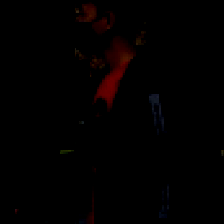

instance73.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


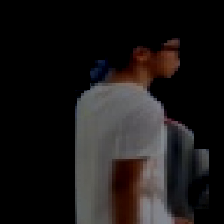

instance81.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


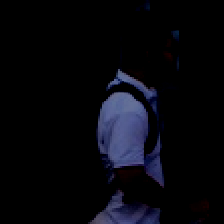

instance87.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


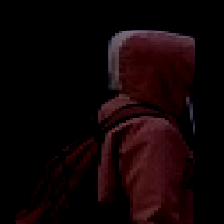

instance85.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


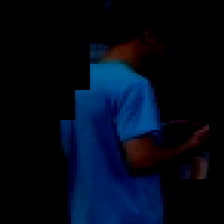

instance96.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


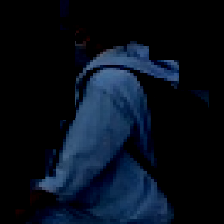

instance92.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


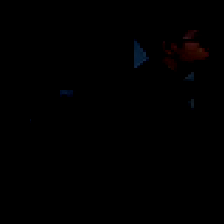

instance91.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


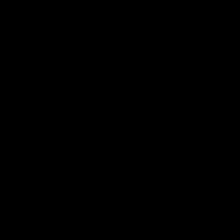

instance88.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


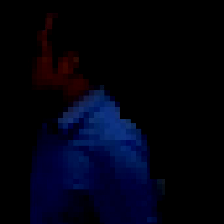

instance90.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


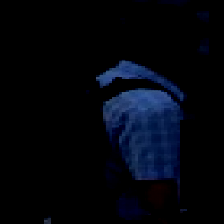

instance94.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


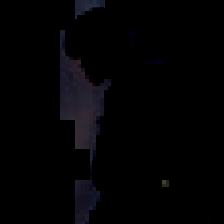

instance95.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


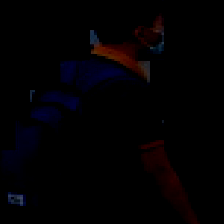

instance97.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


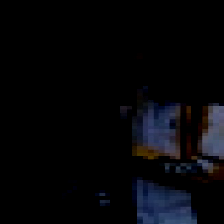

instance99.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


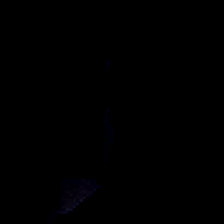

instance100.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


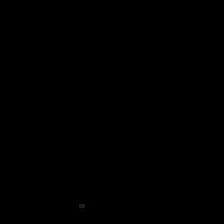

instance108.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


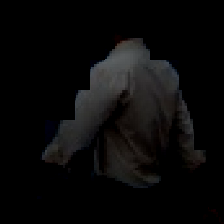

instance103.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


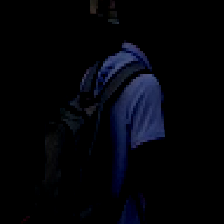

instance105.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


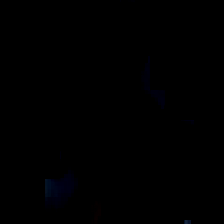

instance110.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


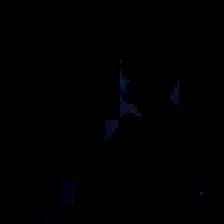

instance107.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


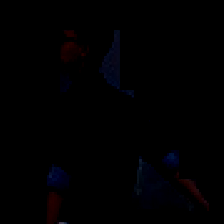

instance104.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


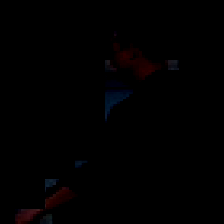

instance109.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


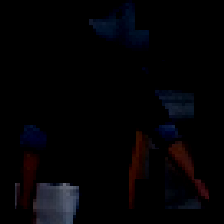

instance111.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


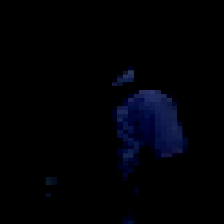

instance115.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


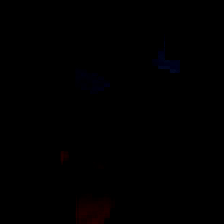

instance112.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


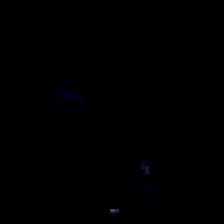

instance113.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


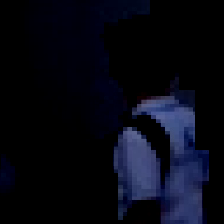

instance125.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


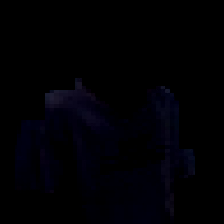

instance126.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


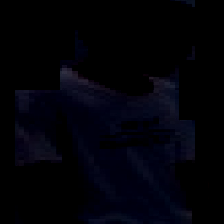

instance116.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


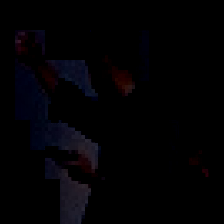

instance128.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


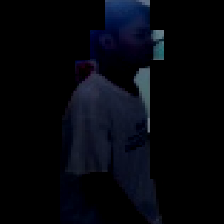

instance127.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


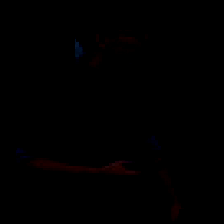

instance129.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


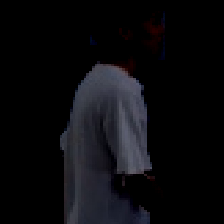

instance131.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


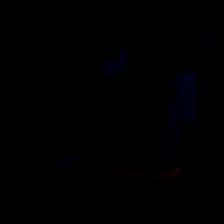

instance134.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


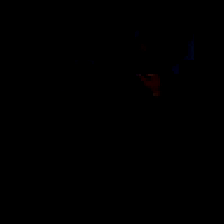

instance136.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


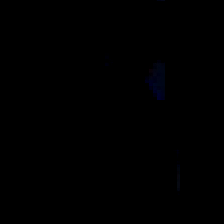

instance135.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


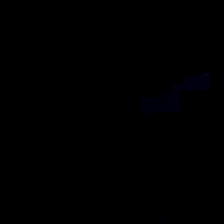

instance140.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


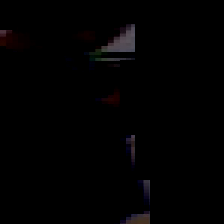

instance137.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


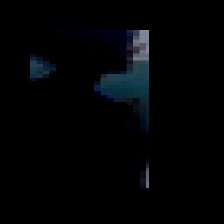

instance152.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


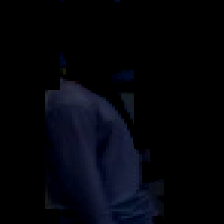

instance138.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


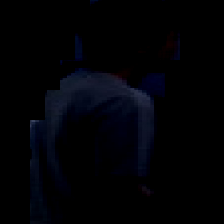

instance153.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


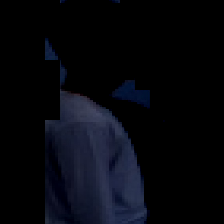

instance151.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


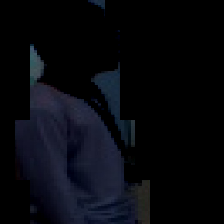

instance154.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


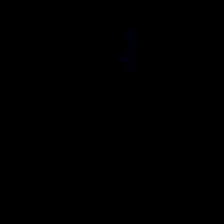

instance155.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


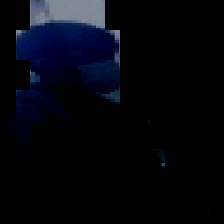

instance157.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


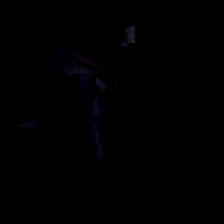

instance156.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


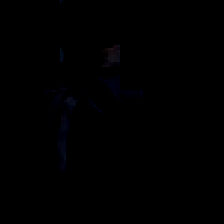

instance171.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


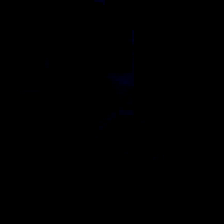

instance170.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


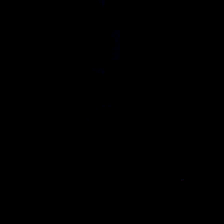

instance173.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


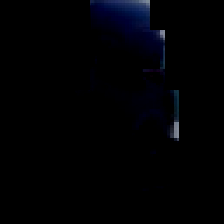

instance158.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


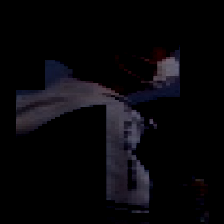

instance174.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


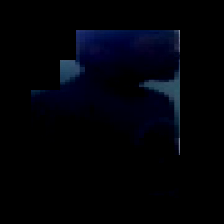

instance172.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


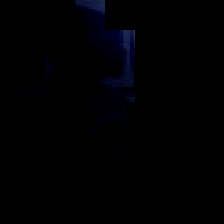

instance175.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


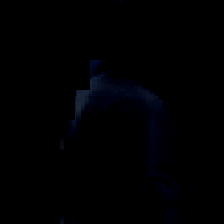

instance1.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


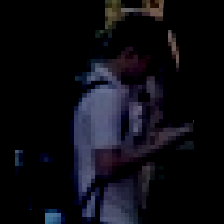

instance3.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


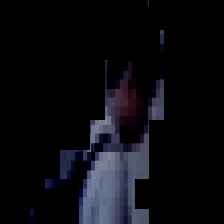

instance5.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


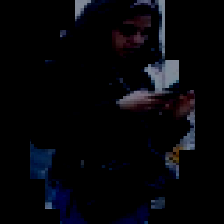

instance2.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


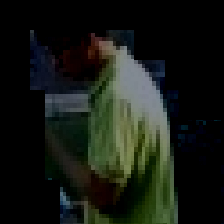

instance24.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


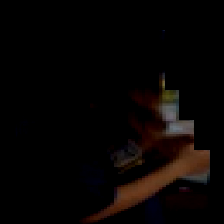

instance9.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


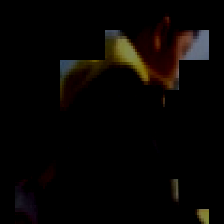

instance28.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


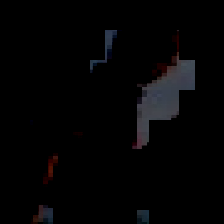

instance21.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


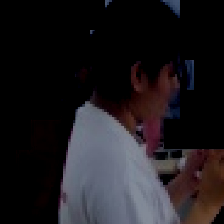

instance12.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


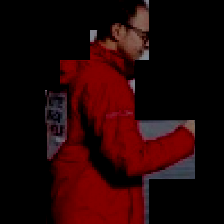

instance29.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


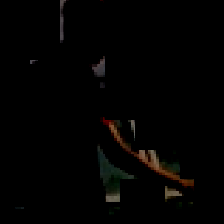

instance33.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


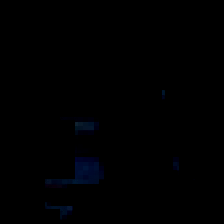

instance52.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


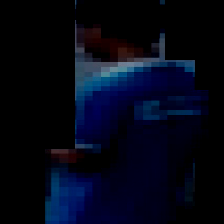

instance43.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


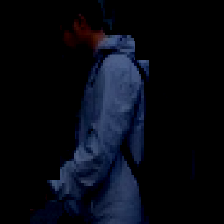

instance51.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


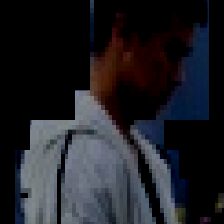

instance44.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


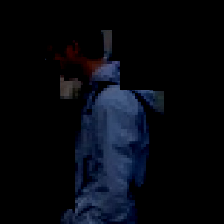

instance53.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


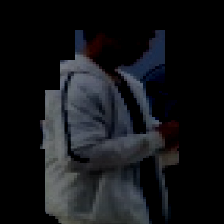

instance41.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


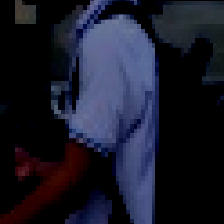

instance46.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


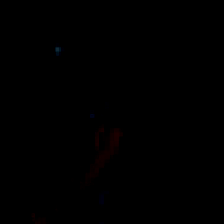

instance36.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


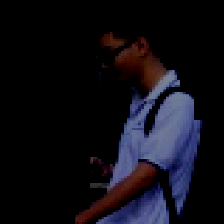

instance54.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


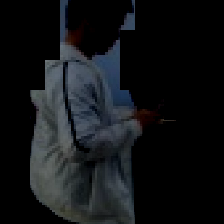

instance55.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


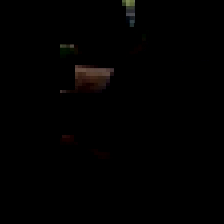

instance58.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


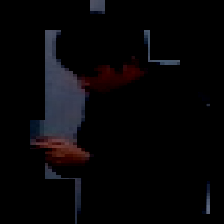

instance57.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


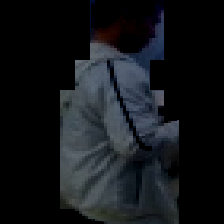

instance56.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


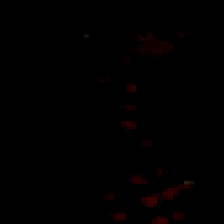

instance64.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


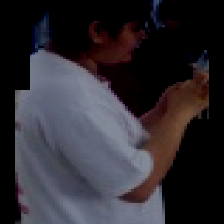

instance66.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


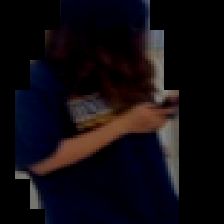

instance67.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


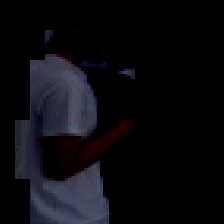

instance63.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


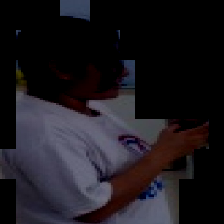

instance61.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


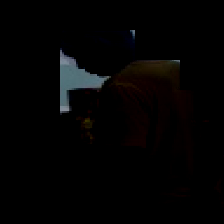

instance60.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


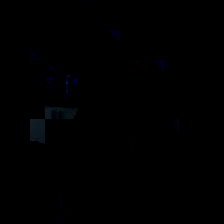

instance68.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


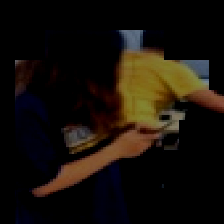

instance69.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


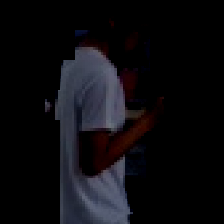

instance119.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


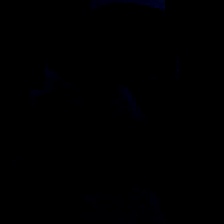

instance98.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


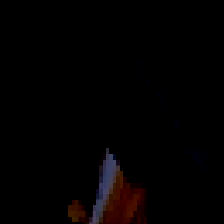

instance117.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


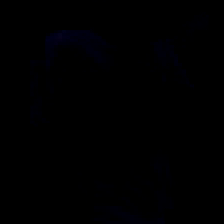

instance70.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


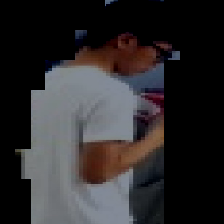

instance86.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


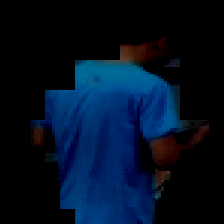

instance93.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


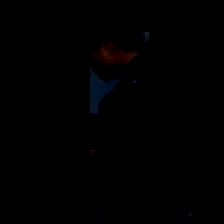

instance120.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


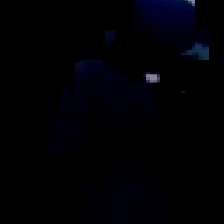

instance118.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


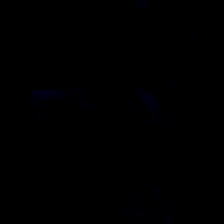

instance121.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


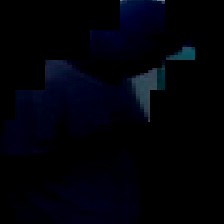

instance122.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


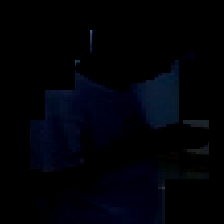

instance124.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


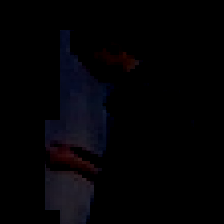

instance123.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


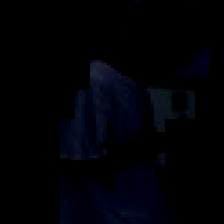

instance141.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


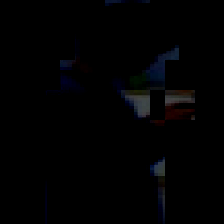

instance133.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


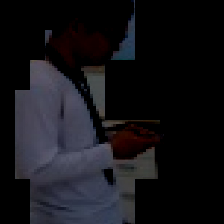

instance143.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


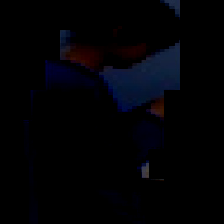

instance130.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


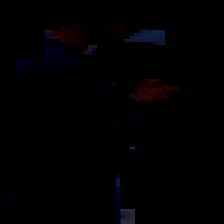

instance132.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


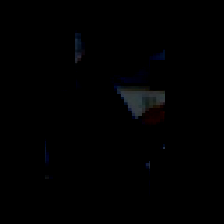

instance142.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


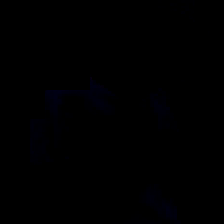

instance145.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


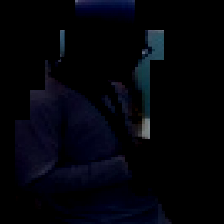

instance148.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


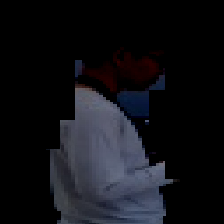

instance146.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


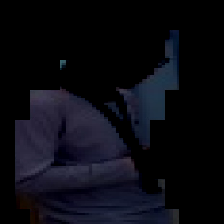

instance147.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


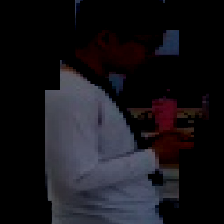

instance159.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


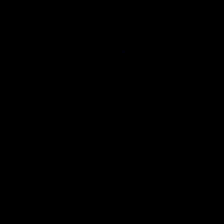

instance160.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


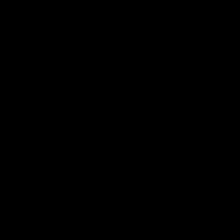

instance162.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


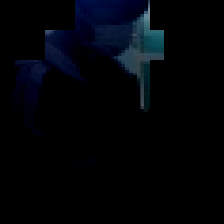

instance161.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


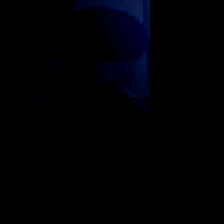

instance163.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


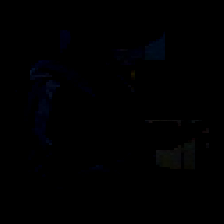

instance165.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


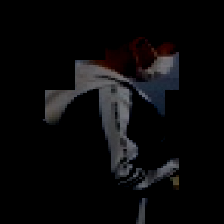

instance166.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


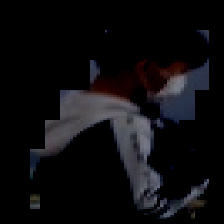

instance168.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


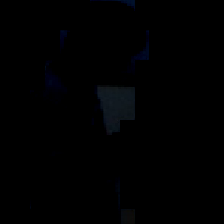

instance169.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D27B8>


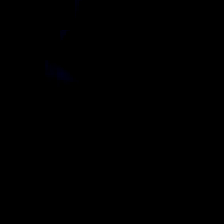

instance167.jpg
<PIL.Image.Image image mode=RGB size=224x448 at 0x7FA7628D2CF8>


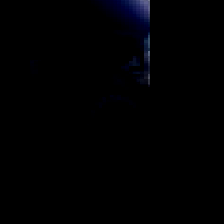

In [0]:
list_image = []
from google.colab.patches import cv2_imshow
for i in range(0,2):
  temp_arr=[]
  branch_folder = folder + "/" + os.listdir(folder)[i]
  for imagePath in os.listdir(branch_folder):

      #resize ảnh về 224x224 pixels
      
        image = load_img(branch_folder+"/"+imagePath,color_mode='rgb',target_size=(448,224))
        
        print(imagePath)
        print(image)
        
        image = img_to_array(image)
        image=image[0:224,]

        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = preprocess_input(image)
        cv2_imshow(image)
        image = np.expand_dims(image, axis = 0)
        list_image.append(image)

      #expand_dims thêm chiều cho input image.shape = (1,224,224,3)
      
    
      
#thêm vào mảng để có được (n,224,224,3) trong đó n là số lượng ảnh được xử lý
list_image = np.vstack(list_image)

In [0]:
features = model.predict(list_image)
# Chuyển tensor thành vector, convolution layer cuối (512*7*7)
features = features.reshape((features.shape[0], 512*7*7))

In [0]:
# Chia traing set, test set tỉ lệ 80-20
from keras.utils.np_utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [0]:
LogReg = LogisticRegression(random_state=1, solver='lbfgs',max_iter=20000,multi_class='multinomial',C=10).fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
params = {'C' : [0.1, 1.0, 10.0, 100.0]}
LogReg = GridSearchCV(LogisticRegression(), params)
LogReg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversion

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
from sklearn.metrics import classification_report
y_pred=LogReg.predict(x_test)

print(y_pred)

print(y_test.values.ravel())
print(y_test.index.values.ravel())
print(classification_report(y_test, y_pred))

[1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0]
[1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0]
[ 69 140  27  19  42 117 126 108  84  18  12  55 128  78  73  36 112 133
 100 101  94 136  11  66  31  45  51  76 111]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29



In [0]:
from sklearn.metrics import classification_report
y_pred=LogReg.predict(x_train)
print(y_train.index.values.ravel())
print(classification_report(y_train, y_pred))

[  9   4  26 120 125  16  10 118  60  67  98 110  97 114   0  65  28  40
  85  24  25  23  80  68  44  15  96  39  56  22  64  81 134  47  30  89
 132  33  82  93  62  95 119  53   5  86 143  49  35  77  34 104   7  43
  70 113  83 124 131   8  13 109 115   3  17  38  72 137   6 138   2 123
  54  50 105  46 141  61 142  79 122  91  41  58  90  48  88 127  21  57
  75  32 139  59  63 129  37  29 107 135   1  52 130 103  99 116  87  74
 121 144  20  71 106  14  92 102]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        65

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

